In [14]:
install.packages('DataExplorer')
library(DataExplorer)
install.packages('corrplot')
library(corrplot)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpuQ9IVM\downloaded_packages


Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'corrplot' is in use and will not be installed"

# Pre-Processing

In [1]:
setwd("C:/Users/rdiml/Documents/")

In [2]:
#loading the data
loan_data <- read.csv(file = "XYZloan_default_selected_vars.csv", stringsAsFactors=F)

In [3]:
head(loan_data)

X,Unnamed..0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13,13,0,0,1449,1449,2249,2249,7,IPHONE7
1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99,-99,-99,-99,-99,-99,-99,-99,NA,WEB
2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3,2,33,0,33,0,143,110,8,WEB
3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0,0,0,0,0,0,0,0,10,OPPO
4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99,-99,-99,-99,-99,-99,-99,-99,NA,WEB
5,6,6,1,32,1,1,12,2017/5/20 22:08,h5,...,6,6,563,563,808,808,808,808,5,WEB


In [4]:
#quick understanding of the size of the data
ncol(loan_data)
nrow(loan_data)

[1] 89

[1] 80000

## Missing data 

In [5]:
sum(is.na(loan_data))

[1] 619076

In [17]:
#using DataExplorer functions 
introduce(loan_data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
80000,89,3,86,0,619076,0,7120000,51547656


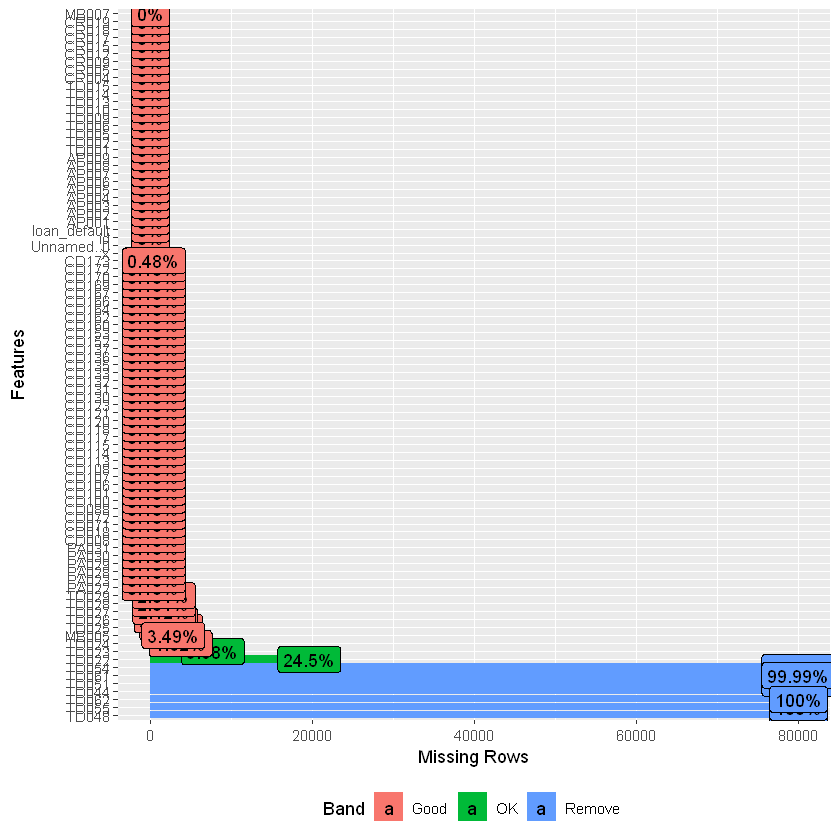

In [18]:
plot_missing(loan_data)

Warning message in dummify(data, maxcat = maxcat):
"Ignored all discrete features since `maxcat` set to 5 categories!"Warning message in cor(x = structure(list(loan_default = c(0L, 0L, 1L, 0L, 0L, 0L, :
"the standard deviation is zero"

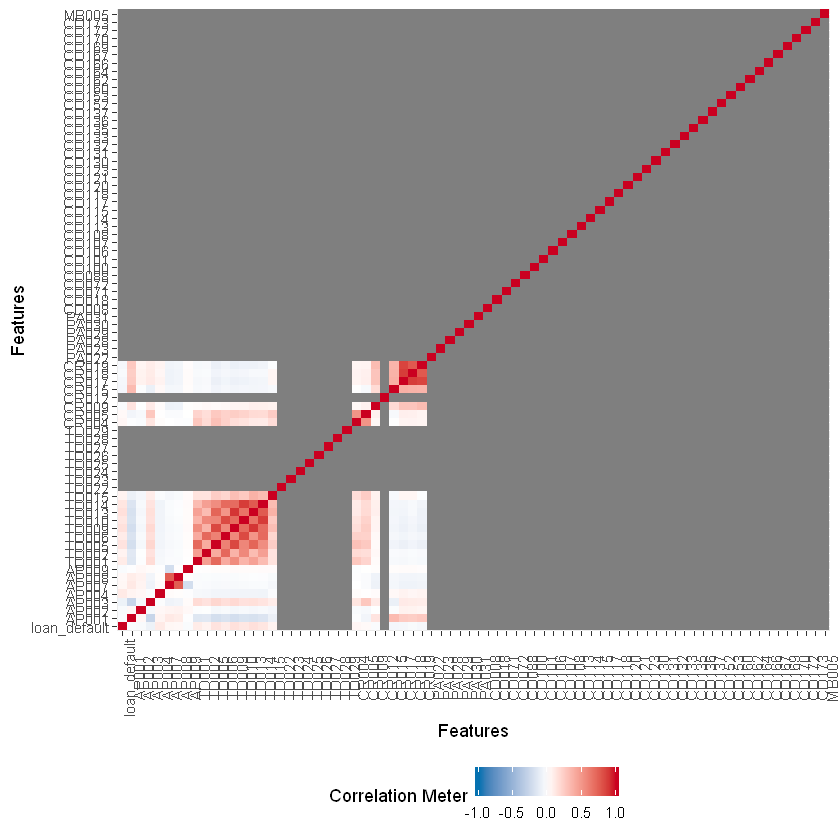

In [23]:
#since there are so many missing values I wanted to visualize how this affected the correlation among the features
plot_correlation(loan_train, maxcat = 5L)

There are a lot of missing data points so I need to investigate where they are occuring and whether it makes sense to address the columns in question or to drop the column. So I am going to create a copy of the dataset so I can impute the missing values and perform the feature selection process here later on. I decided to drop the following columns based on the previous visual TD044, TD048, TD051, TD054, TD055, TD061, TD062. I then dropped X, Unnamed..0, and id because they were inde columns and not contributing meaningful information. I dropped the date column (AP005) and op system (AP006) to perform the feature selection process because the method I used couldn't accept 'character' variable types 

In [16]:
loan_df <- loan_data
loan_df <- subset(loan_df, select= -c(TD044, TD048, TD051, TD054, TD055, TD061, TD062, AP005, AP006, X, Unnamed..0, id))
nrow(loan_df)
ncol(loan_df)

[1] 80000

[1] 77

As opposed to just getting the average value or class of each given column and replacing the NA or missing value with it, I decided to you use the Mice function from the same package to assist with this process

In [6]:
install.packages('mice')
library(mice)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'minqa', 'nloptr', 'RcppEigen', 'ucminf', 'lme4', 'ordinal', 'pan', 'jomo', 'mitml'



package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'ucminf' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'ordinal' successfully unpacked and MD5 sums checked
package 'pan' successfully unpacked and MD5 sums checked
package 'jomo' successfully unpacked and MD5 sums checked
package 'mitml' successfully unpacked and MD5 sums checked
package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpuQ9IVM\downloaded_packages


Loading required package: lattice

Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind



As I previously stated, I didn't want to individually address each column where there were missing values. Therefore, I used predictive mean modeling within the mice function to accomplish this which in turn will allow me to perform the feature selection process without having to use something such as "na.action = na.exclude" for example

In [8]:
mice(loan_data, meth="pmm")


 iter imp variable
  1   1  TD022  TD023  TD024  PA022  PA023  PA028  PA029  PA030  PA031  CD008  CD018  CD071  CD072  CD088  CD100  CD101  CD106  CD107  CD108  CD113  CD114  CD115  CD117  CD118  CD120  CD121  CD123  CD130  CD131  CD132  CD133  CD135  CD136  CD137  CD152  CD153  CD160  CD162  CD164  CD166  CD167  CD169  CD170  CD172  CD173  MB005
  1   2  TD022  TD023  TD024  PA022  PA023  PA028  PA029  PA030  PA031  CD008  CD018  CD071  CD072  CD088  CD100  CD101  CD106  CD107  CD108  CD113  CD114  CD115  CD117  CD118  CD120  CD121  CD123  CD130  CD131  CD132  CD133  CD135  CD136  CD137  CD152  CD153  CD160  CD162  CD164  CD166  CD167  CD169  CD170  CD172  CD173  MB005
  1   3  TD022  TD023  TD024  PA022  PA023  PA028  PA029  PA030  PA031  CD008  CD018  CD071  CD072  CD088  CD100  CD101  CD106  CD107  CD108  CD113  CD114  CD115  CD117  CD118  CD120  CD121  CD123  CD130  CD131  CD132  CD133  CD135  CD136  CD137  CD152  CD153  CD160  CD162  CD164  CD166  CD167  CD169  CD170  CD172  CD1

Warning message:
"Number of logged events: 1153"

# Feature selection and modeling steps

## Splitting the data (70/30 split)

In [19]:
set.seed(100)
loan_split <- sample(1:nrow(loan_df), size=0.7*nrow(loan_df))
loan_train <- loan_df[loan_split,]
loan_test <- loan_df[-loan_split,]
nrow(loan_train)
nrow(loan_test)

[1] 56000

[1] 24000

In [21]:
install.packages('party')
library(party)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'party' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'party'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rdiml\Documents\R\win-library\3.6\00LOCK\party\libs\x64\party.dll to C:\Users\rdiml\Documents\R\win-library\3.6\party\libs\x64\party.dll: Permission denied"Warning message:
"restored 'party'"


The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpuQ9IVM\downloaded_packages


Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich


In [22]:
#I dropped the phone column (MB007) because I was running into issues with running the next step
loan_train.copy <- subset(loan_train, select = -c(MB007))

## Random Forest method 

In [ ]:
cfl_FEAT <- cforest(loan_default~., data = loan_train.copy, control = cforest_unbiased(mtry=2, ntree=20))
varimp(cfl_FEAT)
#adjusting the var importance depending on the correlations between the predictor variables  
varimp(cfl_FEAT, conditional=TRUE)
#importance in consideration of class imbalance
varimpAUC(cfl_FEAT)

## The final model

In [24]:
cfl <- cforest(loan_default~ TD001 + TD005 + TD006 + TD010 + TD013 + TD014
               + AP003 + AP004 + CD008 + CD106 + CD113 + CD135 + CD136
               + CR004 + CR005, data = loan_train.copy, control = cforest_unbiased(mtry=2, ntree=20))

## ROC Curve

In [32]:
#similar to when I was originally running the feature selection process and having issues, I dropped the column to continue making progess
loan_test.copy <- subset(loan_test, select = -c(MB007))

In [34]:
install.packages('ROCR')
librar(ROCR)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpuQ9IVM\downloaded_packages


ERROR: Error in librar(ROCR): could not find function "librar"


In [35]:
pred = predict(cfl, newdata=loan_test.copy)
ROCRpred = prediction(pred,loan_test.copy$loan_default)
perf <- performance(ROCRpred, "tpr","fpr")
plot(perf)

ERROR: Error in prediction(pred, loan_test.copy$loan_default): could not find function "prediction"


## Gains table

In [ ]:
gain.table <- with(subset(loan_train.copy,loan_train.copy$loan_default==0), 
                   gains(actual=loan_test.copy, 
                         predicted=pred, 
                         optimal=TRUE,
                         percents=TRUE)
)
gain.table


# Conclusions

Findings overview after conducting my analysis: 
- The younger age groups (20-29) showed higher correlation with loan default then with individuals who had an older (40-49) recorded age value 
- The higher the education level the less likely a person was to default
